# Наискорейший спуск на сфере
## Постановка задачи
$$\underset{\| x \|^2 - 1 = 0}{min} f(x) = x^T A x$$


In [3]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## В следующей ячейке в первой строке задается матрица квадратичной формы.
### Далее заранее обсчитываются квадрат и куб этой матрицы, задается начальное приближение, потом сразу же проецируется на сферу.

In [23]:
A = np.array([[1., 1., 1., 1., 6.],
              [1., -100., 1., 2., 7.],
              [1.,1.,8., 3., 3.],
              [1., 2., 3., 4., -20.],
              [6., 7., 3., -20., 5.,]])

In [38]:
print A


[[   1.    1.    1.    1.    6.]
 [   1. -100.    1.    2.    7.]
 [   1.    1.    8.    3.    3.]
 [   1.    2.    3.    4.  -20.]
 [   6.    7.    3.  -20.    5.]]


## В следующей ячейке задается функция, которая возвращает значение второй производной целевой функции при выборе шага (см pdf)
$$F'' = \frac{\gamma^3 (-2a_2\widehat{a_2} )+ \gamma^2 (-3a_2\widehat{a_1}) + \gamma(2\widehat{a_2}a_0 - 4a_2\widehat{a_0} + 2a_1\widehat{a_1}) + \widehat{a_1}a_0 + 4a_1\widehat{a_0}}{(\gamma^2 a_2 - 2\gamma a_1 + a_0)^3},$$


$$a_i = {x^k}^T A^i x^k, i = 0,1,2,3$$


In [25]:
def F2(gamma, a2, a2t, a1t, a0, a0t, a1):
    return (gamma**3 * (-2.*a2*a2t) + gamma**2 * (-3. * a2 * a1t) + gamma * (2.*a2t * a0 - 4. * a2 * a0t + 2. * a1 * a1t) + a1t * a0 + 4. * a1 * a0t) / ((a2 * gamma**2 - 2. * gamma * a1 + a0)**3)

# Далее идет сам метод
Шаги вычисляются в соответствии с написанным в статье, с подстраховской на тот случай, если коэффициент при $\gamma^2$ обратится в ноль (помечено "!")

In [26]:
def method(A, x0, print_rate):
    x = x0 / np.linalg.norm(x0)
    A_sq = A.dot(A)
    A_th = A.dot(A_sq)
    notenough = True
    prevx = x
    i = 0
    while(notenough):
        a0 = x.T.dot(x)
        a1 = x.T.dot(np.dot(A,x))
        a2 = x.T.dot(np.dot(A_sq,x))
        a3 = x.T.dot(np.dot(A_th,x))
        a2t = a2**2 - a3 * a1
        a1t = a3 * a0 - a2 * a1
        a0t = a1**2 - a0 * a2
        """
        print a0
        print a1
        print a2
        print a3
        print '_____'
        print a2t
        print a1t
        print a0t
        """
        if (a2**2 - a3 * a1) != 0:
            if i % print_rate == 0:
                print 'case quadr'
            gamma1 = ((a2 * a1 - a3 * a0) + np.sqrt((a2 * a1 - a3 * a0)**2 - 4. * (a2**2 - a3 * a1)*(a1**2 - a0 * a2)))/2. / (a2**2 - a3 * a1)
            gamma2 = ((a2 * a1 - a3 * a0) - np.sqrt((a2 * a1 - a3 * a0)**2 - 4. * (a2**2 - a3 * a1)*(a1**2 - a0 * a2)))/2. / (a2**2 - a3 * a1)
            gamma_list = []
            print 'gamma1 = ', gamma1
            print 'gamma2 = ', gamma2
            print 'F2(gamma1) = ', F2(gamma1, a2, a2t, a1t, a0, a0t, a1)
            print 'F2(gamma2) = ', F2(gamma2, a2, a2t, a1t, a0, a0t, a1)
            for gamma in [gamma1, gamma2]:
                if gamma >=0 and F2(gamma, a2, a2t, a1t, a0, a0t, a1) > 0:
                    gamma_list.append(gamma)
            #print 'gamma_list len = ', len(gamma_list)
            if len(gamma_list) > 0:
                final_gamma = gamma_list[np.random.randint(len(gamma_list))]
            else:
                print 'there is no suitable gamma. i quit'
                return x
                """
                final_gamma = np.random.rand(1) * 7. / 100.
                if i % print_rate == 0:
                    print 'there is no suitable gamma. choosing random from 0 to 0.1'
                """
            if i % print_rate == 0:
                print 'quadr gamma = ', final_gamma 
            x = (x - final_gamma * np.dot(A, x))/ np.linalg.norm(x - final_gamma * np.dot(A, x))
        #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
        if  (a2**2 - a3 * a1) == 0 and (a3 * a0 - a2 * a1) != 0:
            if i % print_rate == 0:
                print 'case linear'
            gamma = (a1**2 - a0 * a2)/(a3 * a0 - a2 * a1)
            if gamma > 0 and F2(gamma, a2, a2t, a1t, a0, a0t, a1) > 0:
                    x = (x - gamma * np.dot(A, x))/ np.linalg.norm(x - gamma * np.dot(A, x))
            else:
                if i % print_rate == 0:
                    print 'you got no suitable gamma'
        if (a3 * a0 - a2 * a1) == 0 and (a2**2 - a3 * a1) == 0:
            if i % print_rate == 0:
                print 'you got rekt'
                print 'iternum = ', i
                print '(a3 * a0 - a2 * a1)', (a3 * a0 - a2 * a1)
                print '(a2**2 - a3 * a1)', (a2**2 - a3 * a1)
                return x
        #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!    
        if i % print_rate == 0:
            print 'iter_num = ', i
            print 'CURRENT X = ', x
            print 'NORM = ', np.linalg.norm(x)
        if (np.linalg.norm(x - prevx) < 1e-6):
            notenough = False
        else:
            prevx = x
        xs.append(x)
        fs.append(x.dot(np.dot(A,x)))
        i += 1
    return x

Начальная точка
$$x_0 = \frac{(0, 1, 1, 0, 0)}{\sqrt{2}}$$

In [39]:
x0 = np.array([0., 1., 1., 0., 0.])
xs = []
fs = []
x = method(A, x0,3)

case quadr
gamma1 =  0.114973651931
gamma2 =  -0.00994973121739
F2(gamma1) =  54.1690578135
F2(gamma2) =  -903944.764685
quadr gamma =  0.114973651931
iter_num =  0
CURRENT X =  [-0.01846802  0.99448116 -0.00279195 -0.04617005 -0.0923401 ]
NORM =  1.0
gamma1 =  -0.39468771327
gamma2 =  -0.00994238811237
F2(gamma1) =  0.000318444763202
F2(gamma2) =  -1377623513.96
there is no suitable gamma. i quit


In [40]:
print 'f* = ', x.dot(np.dot(A,x))
print 'x* = ', x
print 'norm check: ', np.linalg.norm(x)

f* =  -100.505227543
x* =  [-0.01846802  0.99448116 -0.00279195 -0.04617005 -0.0923401 ]
norm check:  1.0


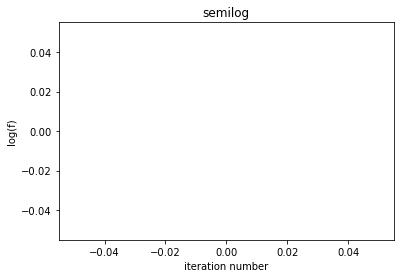

In [41]:
fstar = fs[np.argmin(fs)]
fminfstar = fs - np.ones(len(fs)) * fstar
logf = np.log(np.hstack((fminfstar[:np.argmin(fs)], fminfstar[np.argmin(fs) + 1:])))

plt.figure()
plt.scatter(range(len(logf)), logf)
plt.xlabel('iteration number')
plt.ylabel('log(f)')
plt.title('semilog')
plt.show()

Начальная точка
$$x_0 = \frac{(-1, 1, 3, 0, -2)^T}{\sqrt{15}}$$

In [42]:
x0 = np.array([-1., 1., 3., 0., -2.])
xs = []
fs = []
x = method(A, x0, 1)

case quadr
gamma1 =  0.114128513134
gamma2 =  -0.0113633275253
F2(gamma1) =  429.096259774
F2(gamma2) =  -87986.2735358
quadr gamma =  0.114128513134
iter_num =  0
CURRENT X =  [ 0.00180081  0.91393911  0.06271045 -0.37840493 -0.13262415]
NORM =  1.0
case quadr
gamma1 =  0.302364932372
gamma2 =  -0.00999551187907
F2(gamma1) =  0.152670473423
F2(gamma2) =  -7349536.69029
quadr gamma =  0.302364932372
iter_num =  1
CURRENT X =  [ 0.00207583  0.98860186  0.0033256  -0.04537734 -0.14349874]
NORM =  1.0
case quadr
gamma1 =  0.200843447437
gamma2 =  -0.00994440989295
F2(gamma1) =  0.0285053246681
F2(gamma2) =  -197929013.952
quadr gamma =  0.200843447437
iter_num =  2
CURRENT X =  [ -7.34208676e-04   9.96121206e-01  -4.12322789e-03  -4.65769917e-02
  -7.45358134e-02]
NORM =  1.0
case quadr
gamma1 =  0.31805706889
gamma2 =  -0.00994233303819
F2(gamma1) =  0.000190830226633
F2(gamma2) =  -4871021118.22
quadr gamma =  0.31805706889
iter_num =  3
CURRENT X =  [-0.00481885  0.99662702 -0.00590112

In [43]:
print 'f* = ', x.dot(np.dot(A,x))
print 'x* = ', x
print 'norm check: ', np.linalg.norm(x)

f* =  -100.580905156
x* =  [-0.00519109  0.99685515 -0.00624981 -0.03256347 -0.07178741]
norm check:  1.0


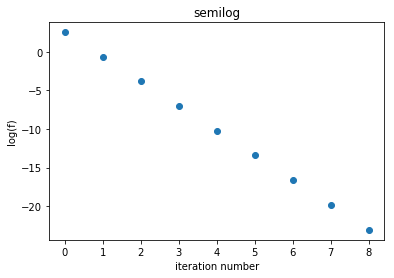

In [44]:
fstar = fs[np.argmin(fs)]
fminfstar = fs - np.ones(len(fs)) * fstar
logf = np.log(fminfstar[:len(fs) - 1])

plt.figure()
plt.scatter(range(len(logf)), logf)
plt.xlabel('iteration number')
plt.ylabel('log(f)')
plt.title('semilog')
plt.show()

Начальная точка
$$x_0 = \frac{(-2, 10, 9, 1, 0)^T}{\sqrt{186}}$$

In [45]:
x0 = np.array([-2., 10., 9., 1., 0.])
x0 = x0 / np.linalg.norm(x0)
xs = []
fs = []
x = method(A, x0, 2)

case quadr
gamma1 =  0.12485978257
gamma2 =  -0.00995103731318
F2(gamma1) =  34.0067546133
F2(gamma2) =  -1048101.76996
quadr gamma =  0.12485978257
iter_num =  0
CURRENT X =  [-0.0316612   0.99688461 -0.01016266 -0.03815115 -0.06049679]
NORM =  1.0
gamma1 =  0.343748922404
gamma2 =  -0.00994232413798
F2(gamma1) =  0.000589432982805
F2(gamma2) =  -1161070033.41
case quadr
gamma1 =  0.141327180204
gamma2 =  -0.00994224795108
F2(gamma1) =  0.000166696540916
F2(gamma2) =  -132785457493.0
quadr gamma =  0.141327180204
iter_num =  2
CURRENT X =  [-0.00529539  0.99689663 -0.0063243  -0.03243218 -0.07125471]
NORM =  1.0
gamma1 =  0.94384119492
gamma2 =  -0.0099422451037
F2(gamma1) =  3.51256026358e-09
F2(gamma2) =  -3.5539382119e+12
case quadr
gamma1 =  0.141702922478
gamma2 =  -0.00994224500668
F2(gamma1) =  2.45820895996e-07
F2(gamma2) =  -8.91245778587e+13
quadr gamma =  0.141702922478
iter_num =  4
CURRENT X =  [-0.00519441  0.99685684 -0.00625262 -0.0325579  -0.07176585]
NORM =  1.0
gamm

In [46]:
print 'f* = ', x.dot(np.dot(A,x))
print 'x* = ', x
print 'norm check: ', np.linalg.norm(x)

f* =  -100.580905156
x* =  [-0.00519117  0.99685517 -0.00624985 -0.03256327 -0.07178719]
norm check:  1.0


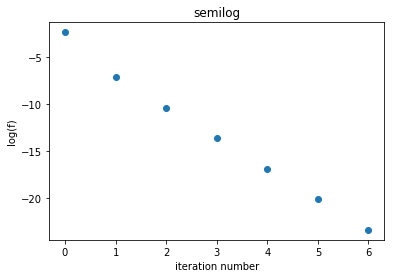

In [47]:
fstar = fs[np.argmin(fs)]
fminfstar = fs - np.ones(len(fs)) * fstar
logf = np.log(fminfstar[:len(fs) - 1])

plt.figure()
plt.scatter(range(len(logf)), logf)
plt.xlabel('iteration number')
plt.ylabel('log(f)')
plt.title('semilog')
plt.show()